<a href="https://colab.research.google.com/github/kbuchman/Scripts-from-studies/blob/master/Statistics/SdA%20UPEL%20Solutions/Lab%201/zadanie1_laboratorium1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing pandas module  
import pandas as pd 
import numpy as np
import matplotlib.pyplot as mpl
import matplotlib.pyplot as plt 
# reading csv file from url  
data = pd.read_csv("https://media.geeksforgeeks.org/wp-content/uploads/nba.csv") 
#informacja jakie pole są w tabeli
data.info()
# pięć pierwszych wierszy to samo byłoby  gdyby użyć data[:5]
data.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    float64
 3   Position  457 non-null    object 
 4   Age       457 non-null    float64
 5   Height    457 non-null    object 
 6   Weight    457 non-null    float64
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(4), object(5)
memory usage: 32.3+ KB


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


# Odwołanie się do elementów tabeli

In [ ]:
#pojedyncza kolumna
print(data.Team)
#pojedynczy element w kolumnie
print(data.Team[300])
#informacje o tym, kto jest w 101 wierszu
print(data.loc[100])
#i do jakiej szkoły chodzili zawodnicy 
print(data.loc[[100, 101], "College"] )
#pełne informacje o zawodnikach o zadanych indeksach
print(data[100:120])

0      Boston Celtics
1      Boston Celtics
2      Boston Celtics
3      Boston Celtics
4      Boston Celtics
            ...      
453         Utah Jazz
454         Utah Jazz
455         Utah Jazz
456         Utah Jazz
457               NaN
Name: Team, Length: 458, dtype: object
San Antonio Spurs
Name                  Chris Paul
Team        Los Angeles Clippers
Number                       3.0
Position                      PG
Age                         31.0
Height                       6-0
Weight                     175.0
College              Wake Forest
Salary                21468695.0
Name: 100, dtype: object
100    Wake Forest
101         Kansas
Name: College, dtype: object
                  Name                  Team  Number Position   Age Height  \
100         Chris Paul  Los Angeles Clippers     3.0       PG  31.0    6-0   
101        Paul Pierce  Los Angeles Clippers    34.0       SF  38.0    6-7   
102     Pablo Prigioni  Los Angeles Clippers     9.0       PG  39.0    6-3   


In [ ]:
# proszę samodzielnie przećwiczyć odwołanie się do elementów tabeli ( DataFrame)
# za pomocą różnych poleceń
print(data.loc[20:30, "Team"])
print(data.Team[24])

20      Brooklyn Nets
21      Brooklyn Nets
22      Brooklyn Nets
23      Brooklyn Nets
24      Brooklyn Nets
25      Brooklyn Nets
26      Brooklyn Nets
27      Brooklyn Nets
28      Brooklyn Nets
29      Brooklyn Nets
30    New York Knicks
Name: Team, dtype: object
Brooklyn Nets


#Szeregi statystyczne 
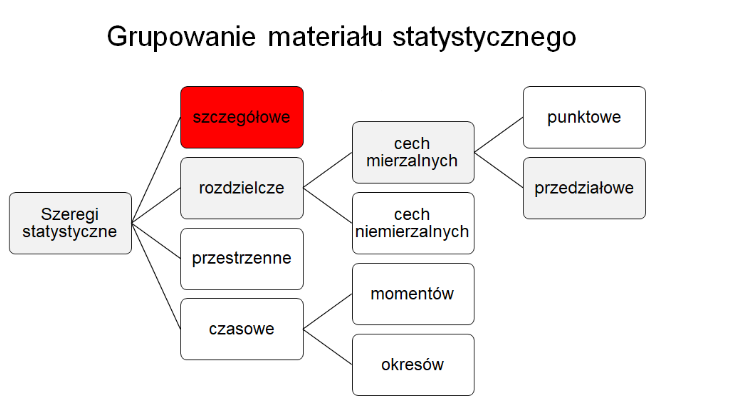

**Szereg (serie) szczegółowy** (inna nazwa to szereg prosty lub szereg wyliczający) to posortowany surowy materiał statystyczny.
W ten sposób możemy sprawdzić ile lat ma najmłodsza osoba, w NBA , a ile najstarsza.

In [ ]:
# Do posortowanie danych według zawartości kolumn, a nie indeksów można użyć metody 
data.sort_values(["Age"], ascending=[False]).head(2) 
#False oznacza malejąco 



,Name,Team,Number,Position,Age,Height,Weight,College,Salary
304,Andre Miller,San Antonio Spurs,24.0,PG,40.0,6-3,200.0,Utah,250750.0
400,Kevin Garnett,Minnesota Timberwolves,21.0,PF,40.0,6-11,240.0,NaN,8500000.0


In [ ]:
# zawodnicy najmłodsi to ...
print(data.sort_values(["Age"])[1:10])

                   Name                    Team  Number Position   Age Height  \
122        Devin Booker            Phoenix Suns     1.0       SG  19.0    6-6   
40   Kristaps Porzingis         New York Knicks     6.0       PF  20.0    7-3   
401          Tyus Jones  Minnesota Timberwolves     1.0       PG  20.0    6-2   
427     Cliff Alexander  Portland Trail Blazers    34.0       PF  20.0    6-8   
116    D'Angelo Russell      Los Angeles Lakers     1.0       PG  20.0    6-5   
441         Noah Vonleh  Portland Trail Blazers    21.0       PF  20.0    6-9   
356        Aaron Gordon           Orlando Magic     0.0       PF  20.0    6-9   
56        Jahlil Okafor      Philadelphia 76ers     8.0        C  20.0   6-11   
445          Dante Exum               Utah Jazz    11.0       PG  20.0    6-6   

     Weight     College     Salary  
122   206.0    Kentucky  2127840.0  
40    240.0         NaN  4131720.0  
401   195.0        Duke  1282080.0  
427   240.0      Kansas   525093.0  
116 

In [ ]:
# zawodnik o największej/najmniejszej wadze
print(data.sort_values(["Weight"])[1])
print(data.sort_values(["Weight"])[-1])

KeyError: ignored

#Szereg rozdzielczy cech mierzalnych przedziałowych
**Szereg rozdzielczy** stanowi zbiorowość statystyczną, podzieloną na części (klasy) według określonej cechy mierzalnej lub niemierzalnej z podaniem liczebności lub częstości każdej z wyodrębnionych klas.
Inna nazwa **szereg strukturalny**.
Szeregi rozdzielcze cechy mierzalnej dzielą się na szeregi punktowe, które budowane są dla cech skokowych i przedziałowe dla cech ciągłych. Zestawienie wyników w postaci szeregu rozdzielczego nazywam **rozkładem empirycznym**. Taki rozkład wybranej cechy polega na wyliczeniu częstości występowania poszczególnych jednostek w pewnych przedziałach.  

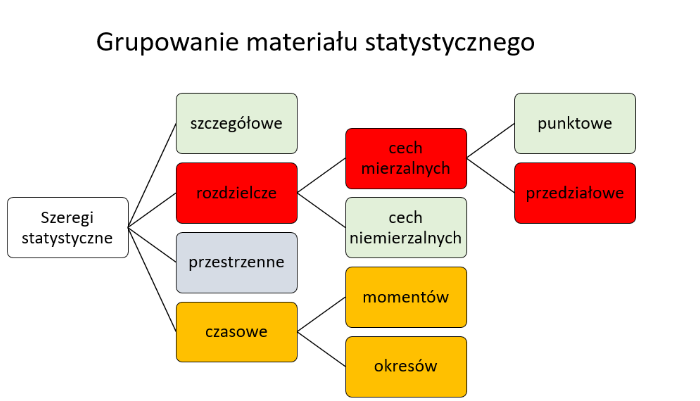

Zarówno wzrost jak i waga są szeregami rozdzielczymi cech mierzalnych przedziałowych. Liczbę klas należy obliczyć.
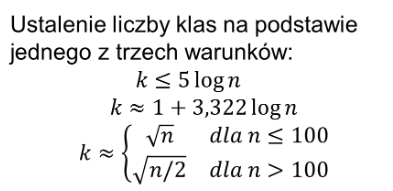

13


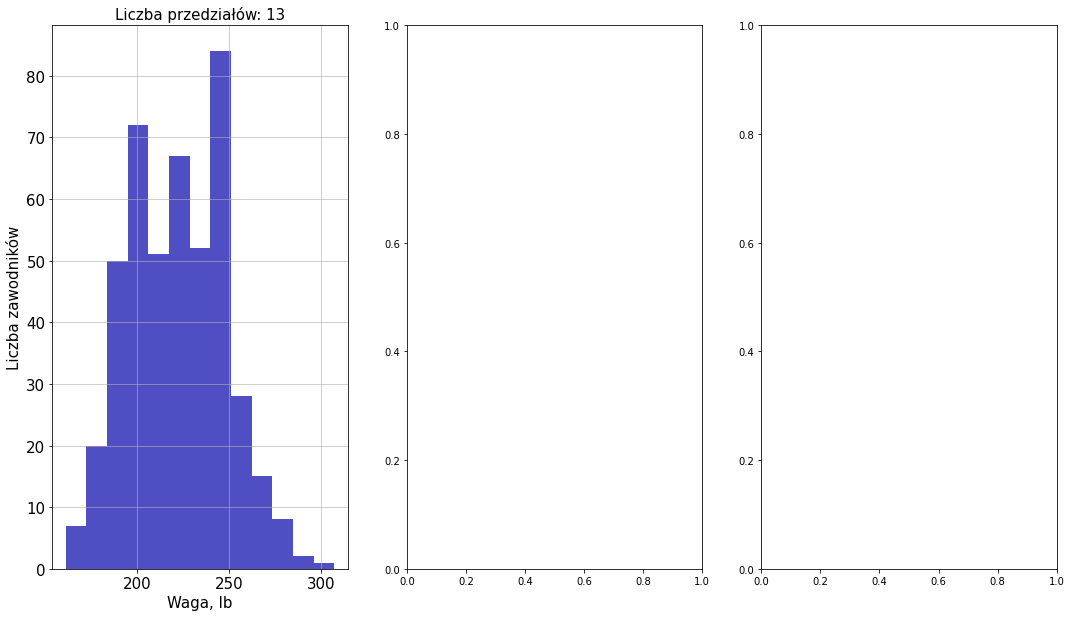

In [ ]:
import math
k1=round(5*math.log10(364))
print(k1)

# Proszę wyliczyć k2 i k3

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,3)
fig.set_size_inches(18, 10)

axs[0].hist(x=data.Weight, bins=k1, color='#0504aa',alpha=0.7, rwidth=1)
axs[0].set_title('Liczba przedziałów: ' + str(k1), fontsize=15)
axs[0].grid( alpha=0.75)
axs[0].set_xlabel('Waga, Ib',fontsize=15)
axs[0].set_ylabel('Liczba zawodników',fontsize=15)
axs[0].tick_params(axis="x", labelsize=15) 
axs[0].tick_params(axis="y", labelsize=15) 

# Proszę narysować histogramy dla k wyliczonych według pozostałych zależności (subplot: axs[1], axs[2])


#Statystyki
**Szereg rozdzielczy cech mierzalnych przedziałowych - co liczymy ?**

import numpy as np

**Średnia arytmetyczna:**
 m=np.mean(x)

**Wariancja var(x)**
 i **ochylenie standardowe**, będące pierwiastkiem z wariancji **std(x)**:

Przy obliczaniu tych statystyk z próby obliczamy wariancję i odchylenie "z daszkiem", czyli estymator nieobciążony (dzielenie przez n-1). W innych przypadkach konieczne może być użycie innego estymatora, na co należy zawsze zwrócić uwagę.
Uwaga! 

**Pozostałe średnie**: 

geomean(X) - geometryczna, 

harmmean(x) - **harmoniczna** --> kiedy je stosować?

**Dominanta **(wartość modalna, moda, wartość najczęstsza) - **mode**(x) z bibliteki from statistics import mode ( bez np. mode)

**Mediana** (wartość środkowa) - median(x)

**Wartość maksymalna** i **minimalna** 
oraz** rozrzut** - max, min, range (max-min)

Inne statystyki rozkładu empirycznego:

**kurtosis**- kurtoza 

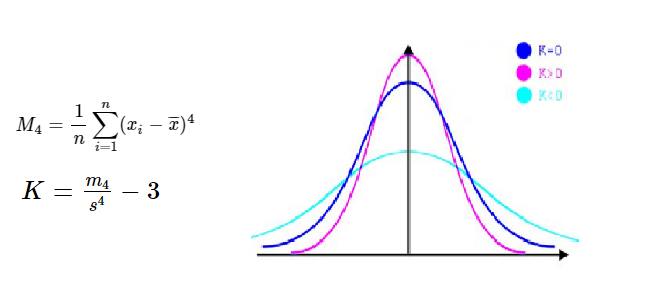
**skewness** - skośność 
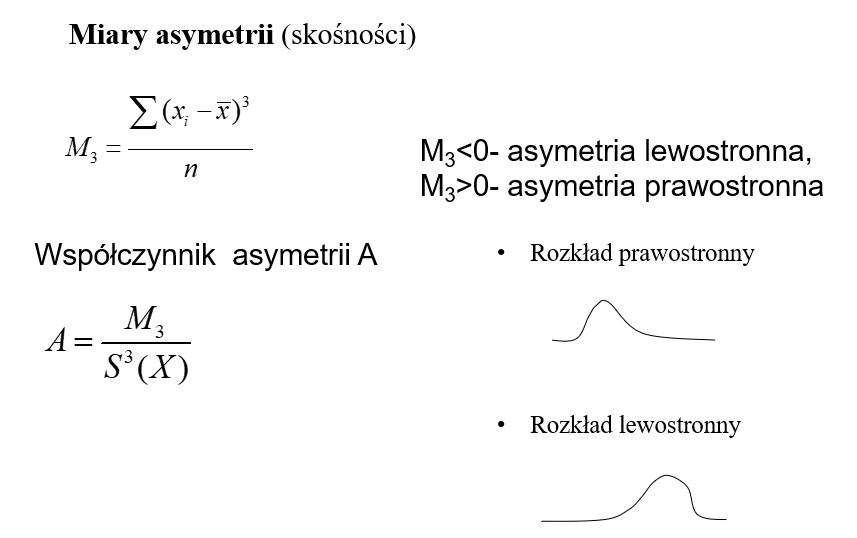
**range**(X) - zakres 

**quantile **- kwantyle (w szczególności - kwartyle)


Kwartyle dzielą wszystkie nasze obserwacje na cztery równe co do liczności obserwacji grupy. 
Kwartyl pierwszy (Q1) dzieli dzieli obserwacje w stosunku 25% - 75%, co oznacza, że 25% obserwacji jest niższa bądź równa wartości I-ego kwartyla, a 75% obserwacji jest równa bądź większa niż wartość I-ego kwartyla
Kwartyl drugi (Q2), inaczej zwany medianą dzieli obserwacje na dwie części w stosunku 50%-50%. Szerzej mediana została opisana w innym artykule - Mediana
Kwartyl trzeci (Q3) dzieli obserwacje w stosunku 75% - 25%, co oznacza, że 75% obserwacji jest niższa bądź równa wartości III-ego kwartyla, a 25% obserwacji jest równa bądź większa niż wartość III-ego kwartyla.

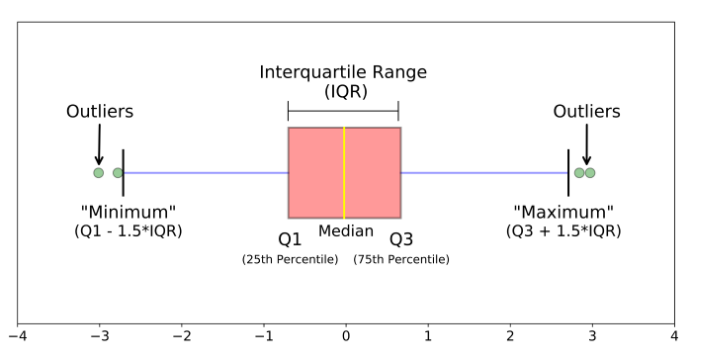

In [ ]:
# koniecznym wydaje się usunięcie z tabeli tych wierszy, w których brakuje informacji np. tylko 446 zawodników podało swoje zarobki
# ile jest wierszy i kolumn ?
print("\n liczba rzędów i kolumn w tabeli = ",data.shape)
# usuwanie wierszy z NAN, "" itp
data=data.dropna()
print("\nDataFrame po usunięciu wartości NAN...\n",data.shape)
# zmiana indeksów 
data = data.reset_index(drop=True)


 liczba rzędów i kolumn w tabeli =  (458, 9)

DataFrame po usunięciu wartości NAN...
 (364, 9)


In [ ]:
import numpy as np
from statistics import mode

m=np.mean(data.Salary)
print('średnia arytmetyczna= ', '%.2f'% m)

# proszę wyliczyć modalną, wartość minimalną i maksymalną dla zarobków

# modalna = mode(data.Salary)

#  proszę wyliczyć kwartyle

mediana=np.quantile(data.Salary, 0.5)
print('mediana = ', '%.2f'% mediana)


średnia arytmetyczna=  4620311.07
mediana =  2515440.00


**Uwaga ! Domyślnie wyliczane  są statystyki dla populacji, a nie dla próby**

In [ ]:
wariancja1=np.var(data.Salary)
wariancja2=np.var(data.Salary,ddof=1 )
print('wariancja w populacji =', '%.2f'% wariancja1,', wariancja w próbie = ', '%.2f'% wariancja2 )

# proszę wyliczyć odchylenie standardowe dla próby


wariancja w populacji = 26139478040870.71 , wariancja w próbie =  26211487622250.52


# Grupy
Jeśli chcemy wiedzieć jaka jest suma wydatków na płace w poszczególnych drużynach, albo ile średnio zarabiają w zależności od pozycji, na której grają zawodnicy.
Konieczne jest indeksowanie tablicy po danej kategorii i dopiero w tej nowej tablicy policzenie statystyk.



In [ ]:
d1=data.set_index("Position")
d2=d1.sum(level="Position")
print(d2.Salary)

Position
PG    373621258.0
SF    326309441.0
SG    338174035.0
PF    361259021.0
C     282429475.0
Name: Salary, dtype: float64


<ipython-input-16-8d82ef4bd996>:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  d2=d1.sum(level="Position")


In [ ]:
#Proszę policzyć statystyki średnią i medianę dla zarobków w zależności od pozycji, w której gra zawodnik
statystyki = data.groupby('Position').describe()
print(statystyki.info())
print(statystyki)


<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, C to SG
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Number, count)  5 non-null      float64
 1   (Number, mean)   5 non-null      float64
 2   (Number, std)    5 non-null      float64
 3   (Number, min)    5 non-null      float64
 4   (Number, 25%)    5 non-null      float64
 5   (Number, 50%)    5 non-null      float64
 6   (Number, 75%)    5 non-null      float64
 7   (Number, max)    5 non-null      float64
 8   (Age, count)     5 non-null      float64
 9   (Age, mean)      5 non-null      float64
 10  (Age, std)       5 non-null      float64
 11  (Age, min)       5 non-null      float64
 12  (Age, 25%)       5 non-null      float64
 13  (Age, 50%)       5 non-null      float64
 14  (Age, 75%)       5 non-null      float64
 15  (Age, max)       5 non-null      float64
 16  (Weight, count)  5 non-null      float64
 17  (Weight, mean)   5 non-n

In [ ]:
# Organizacja dla statystyk dla jednej kolumny ma postać
statystyki2 = data.groupby('Position').agg({'Salary': ['mean', 'median', 'min', 'max']})
# czy wyliczone średnie i mediany są take same ?
#odp:

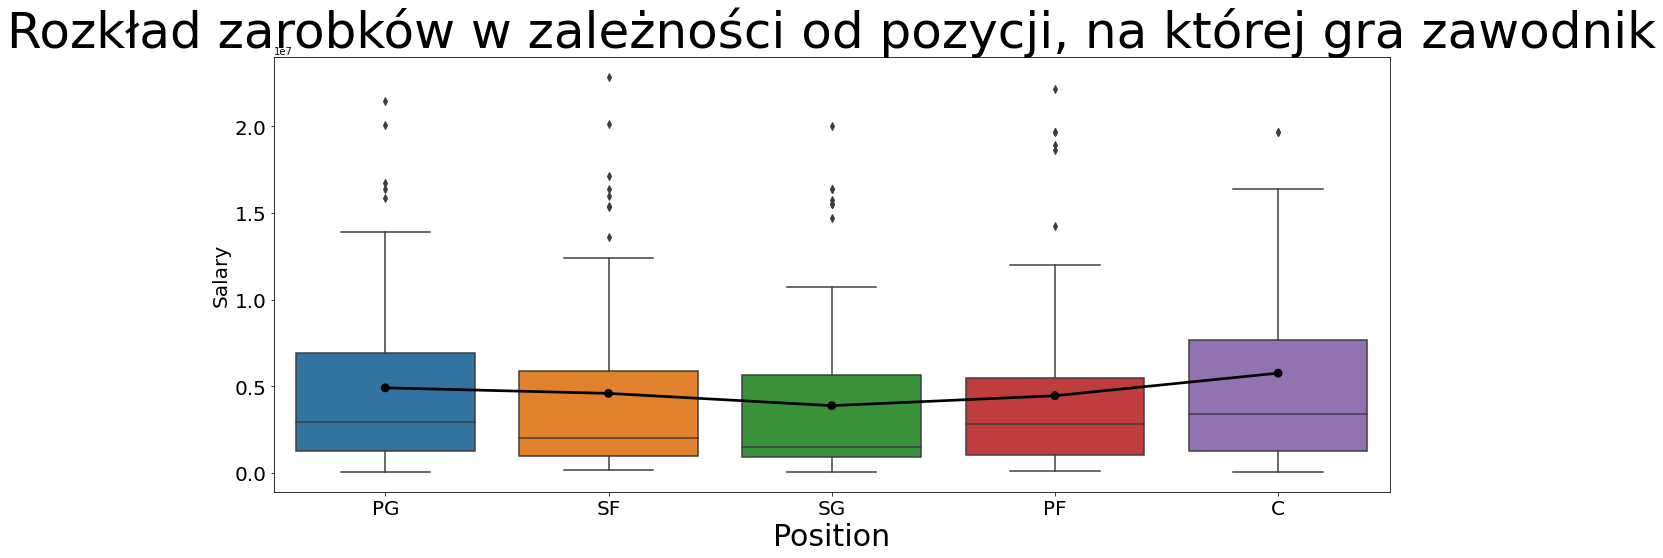

In [ ]:
# wizualizacja obliczeń:
import seaborn as sns
plt.figure(figsize=[20,8])
b=sns.boxplot(x='Position', y='Salary', data=data)
b.axes.set_title("Rozkład zarobków w zależności od pozycji, na której gra zawodnik",fontsize=50)
b.set_xlabel("Pozycja",fontsize=30)
b.set_ylabel("Zarobki",fontsize=20)
b.tick_params(labelsize=20)
b1=sns.pointplot(x='Position', y='Salary', data=data, ci=None, color='black')

# komentarz do tych wyników na której pozycji średnia/ mediana są największe, na której najmniejsze ? 


# inny komentarz ...



In [ ]:
# Proszę policzyć średnią, medianę, max, min, odchylenie standardowe, wariancję i sumę w zależności od drużyny, w której gra zawodnik

# proszę narysować rozkład zarobków w zależności od drużyny, w której gra zawodnik
